##Imports

In [0]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import glob

##Downloading and pre-processing data

In [3]:
api_token = {"username": 'xxx',"key": 'xxx'}

!mkdir /root/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle datasets download -d fpeccia/weed-detection-in-soybean-crops

100% 2.36G/2.37G [00:58<00:00, 38.2MB/s]
100% 2.37G/2.37G [00:58<00:00, 43.1MB/s]


In [0]:
!unzip -q weed-detection-in-soybean-crops.zip

In [6]:
print(os.listdir())

['.config', 'weed-detection-in-soybean-crops.zip', 'dataset', 'sample_data']


In [0]:
!rm -r ./dataset/broadleaf/*
!rm -r ./dataset/grass/*
!rm -r ./dataset/soil/*
!rm -r ./dataset/soybean/*

##Augmentation

In [0]:
class Data_augmentation:
    def __init__(self, path, image_name):
        self.path = path
        self.name = image_name
        self.image = cv2.imread(path+image_name)

    def rotate(self, image, angle=90, scale=1.0):
        w = image.shape[1]
        h = image.shape[0]
        M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
        image = cv2.warpAffine(image,M,(w,h))
        return image

    def flip(self, image, vflip=False, hflip=False):
        if hflip or vflip:
            if hflip and vflip:
                c = -1
            else:
                c = 0 if vflip else 1
            image = cv2.flip(image, flipCode=c)
        return image 
    
    
    def image_augment(self, save_path): 
        img = self.image.copy()
        img_flip = self.flip(img, vflip=True, hflip=False)
        img_rot = self.rotate(img)
        
        name_int = self.name[:len(self.name)-4]
        cv2.imwrite(save_path+'%s' %str(name_int)+'_vflip.jpg', img_flip)
        cv2.imwrite(save_path+'%s' %str(name_int)+'_rot.jpg', img_rot)

def main(file_dir,output_path):
        for root, _, files in os.walk(file_dir):
          for file in files:
            raw_image = Data_augmentation(root,file)
            raw_image.image_augment(output_path)

In [0]:
main(file_dir='./dataset/dataset/broadleaf/', output_path='./dataset/broadleaf/')
main(file_dir='./dataset/dataset/grass/', output_path='./dataset/grass/')
main(file_dir='./dataset/dataset/soil/', output_path='./dataset/soil/')
main(file_dir='./dataset/dataset/soybean/', output_path='./dataset/soybean/')

##Preprocessing

In [16]:
os.chdir('/content/')

classes = ['broadleaf', 'grass', 'soil', 'soybean'] 
data_dir = r'./dataset/dataset/'
directory = data_dir
pathname = os.path.join(directory,classes[0])
broadleaf = os.listdir(pathname)
pathname = os.path.join(directory,classes[1])
grass = os.listdir(pathname)
pathname = os.path.join(directory,classes[2])
soil = os.listdir(pathname)
pathname = os.path.join(directory,classes[3])
soybean = os.listdir(pathname)
print(classes[0] , str(len(broadleaf)))
print(classes[1] , str(len(grass)))
print(classes[2] , str(len(soil)))
print(classes[3] , str(len(soybean)))

broadleaf 1191
grass 3520
soil 3249
soybean 7376


In [0]:
def show_image(filename):
  image = plt.imread(filename,format='tif')
  fig, ax = plt.subplots()
  im = ax.imshow(image)
  plt.show()
  print(image.shape)

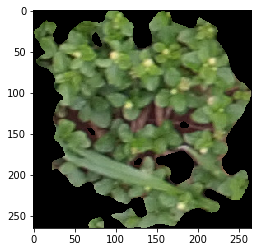

(265, 266, 3)


In [18]:
show_image(os.path.join(os.path.join(directory,classes[0]),broadleaf[random.randint(0,len(broadleaf))]))

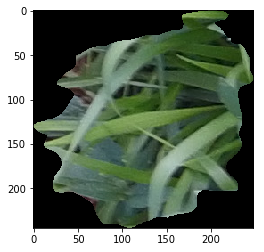

(245, 248, 3)


In [19]:
show_image(os.path.join(os.path.join(directory,classes[1]),grass[random.randint(0,len(grass))]))

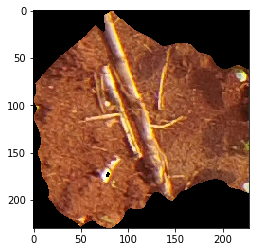

(230, 228, 3)


In [20]:
show_image(os.path.join(os.path.join(directory,classes[2]),soil[random.randint(0,len(soil))]))

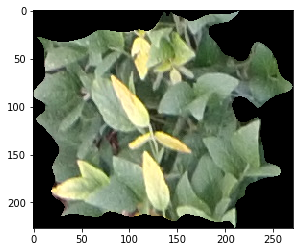

(227, 271, 3)


In [21]:
show_image(os.path.join(os.path.join(directory,classes[3]),soybean[random.randint(0,len(soybean))]))